Importing Dependencies

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Loading Data 


In [20]:
#loading dataset 
df= pd.read_csv('Iris Dataset.csv')

Visualization

We visualize the dataset by printing the first ten rows of the data frame. We use the head() function for the same. 

In [21]:
#visualizing dataset
df.head(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [22]:
#finding different class labels 
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We notice that there are three different classes present in the dataset. 


In [23]:
df.shape


(150, 6)

We observe that our dataset consists of 150 rows and six columns. 



In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


C:\Users\varti\AppData\Local\Temp\ipykernel_6012\3092519136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=df.corr()


<Axes: >

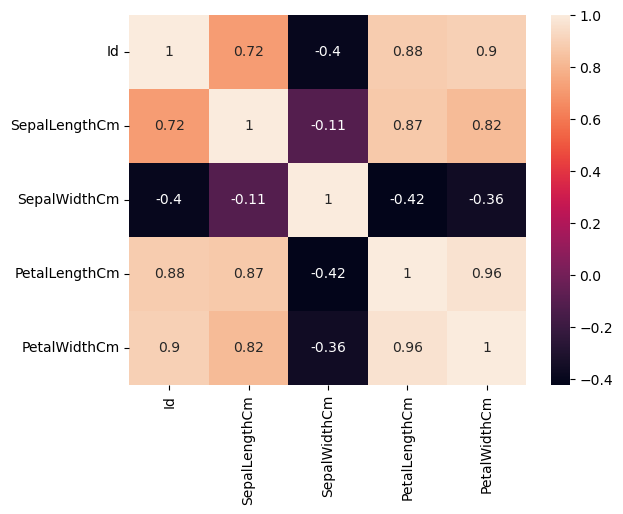

In [25]:
#finding correlation of features 
correl=df.corr()
sns.heatmap(correl,annot=True)

From the above, we observe that bigger values are represented with light color. This observation will always be the same for the heatmap. Dark values will always be less than light-colored values.

Now, we will use Matplotlib for a scatter plot. 



Text(0.5, 1.0, 'Scatter Plot')

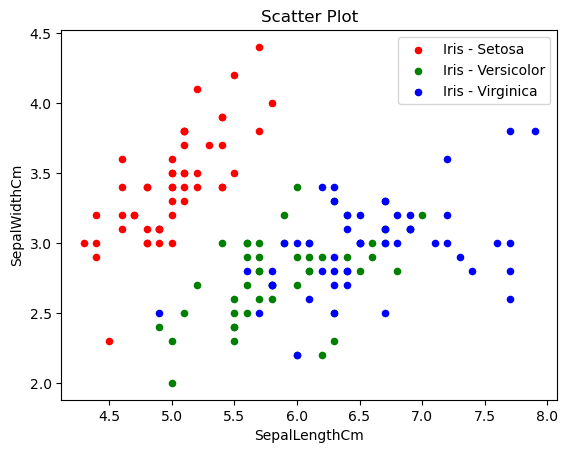

In [26]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

Data imputation

In [27]:
#checking for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We observe that the dataset does not contain any Null values.



Label Encoding

We perform label encoding for converting the categorical feature ‘Species’ into a numerical one. 



In [28]:
#Label Encoding - for encoding categorical features into numerical ones
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [29]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [30]:
#finding different class labels 
np.unique(df['Species'])

array([0, 1, 2])

As noticeable above, all target values are now numerical. 



Insignificant Features


We drop ‘ID’ as this feature is insignificant. 



In [31]:
#DROPPING ID 
df= df.drop(['Id'], axis = 1)

In [32]:
df.shape


(150, 5)

Train-Test Split


Now, we will divide our data into training data and testing data. We will have a 3:1 train test split.

In [33]:
#converting dataframe to np array 
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


Training 


We will build our KMeans model using the sklearn library and then train it on the given iris dataset. 



In [34]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

C:\Users\varti\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\varti\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Results


Now, we analyze our models and generate the result.



In [35]:
#KMeans model accuracy

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)


9.821428571428571
94.73684210526315
